# [실습] 국가별 음주 데이터 분석하기

두번째 실습은 국가별 음주 데이터를 활용해 탐색적 분석을 진행하는 것입니다. **국가별 맥주, 증류주, 와인 소비량과 총 알코올 소비량, 그리고 국가별 대륙 정보**가 나와있습니다.

## 1단계) 데이터의 기초 정보 살펴보기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../Data Analysis/python-data-analysis/data/drinks.csv'
drinks = pd.read_csv(file_path)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


국가명 피처와 대륙 피처를 제외하고 모두 연속형 피처임을 확인할 수 있습니다. 수치형에 대한 정보를 요약통계량을 보여주는 **describe** 함수를 사용합니다.

In [6]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 2단계) 인사이트의 발견: 데이터 시각화

### 상관 분석이란?
상관 분석은 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것입니다. 상관 계수를 구하는 것은 **공분산**의 개념을 포함합니다. 공분산은 공통 분산을 의미하는데, 공분산을 -1에서 1사이의 값으로 변환한 것이 **상관 계수** 입니다. 상관계수가 -1에 가까울수록 음의 상관 관계가 강한 것이며, 1에 가까울수록 양의 상관 관계가 강하다고 표현합니다. 반면 0에 가까우면 상관 관계가 약한 것입니다.

이제 피처 간의 상관 관계를 살펴볼 것입니다. 피처 간의 상관 관계를 통계적으로 탐색하는 방법은 2가지 입니다.
- 피처가 2개일 때의 상관계수를 계산하는 **'단순 상관 분석'**
- 피처가 여러 개일때의 상호 연관상을 분석하는 **'다중 상관 분석'**

이 중 **단순 상관 분석**을 사용하여 탐색적 분석을 진행해보겠습니다.

상관 관계를 살펴볼 피처는 맥주 소비량, 증류주 소비량, 와인 소비량, 그리고 총 알코올 소비량입니다. **알코올의 종류만 다르지 다 같은 술이지 않습니까..?** 

결국 '술'이라는 범주 안에서 비슷한 의미를 가지는 피처이기 때문에 상관 관계가 궁금해집니다.

In [7]:
# 맥주 소비량과 와인 소비량의 상관 관계
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson') # 보통 pearson 상관 계수를 사용합니다.
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


**corr** 함수는 두 피처의 상관 계수를 matrix 형태로 출력할 수 있게 만들어줍니다. 출력 결과, 맥주 소비량과 와인 소비량의 상관 계수는 0.52가 나옵니다.

In [8]:
# 주종별 소비량과 전체 알코올 소비량의 상관 관계
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


이를 좀 더 쉽게 보여주기 위해 시각화 기법 중 하나인 **heatmap** 과 **pairplot** 기법을 사용해보겠습니다. 파이썬의 **seaborn** 이라는 시각화 라이브러리를 사용하면 이 2개의 기법을 사용할 수 있습니다.

## 1) heatmap

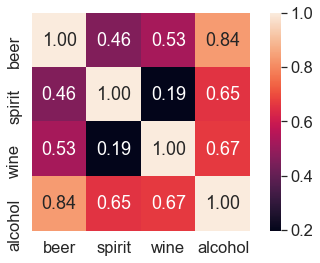

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.5)
heat_map = sns.heatmap(corr.values,
                      cbar = True,
                      annot = True,
                      square = True,
                      fmt = '.2f',
                      annot_kws = {'size': 18},
                      yticklabels = cols_view,
                      xticklabels = cols_view)
plt.tight_layout()
plt.show()

위의 히트맵의 경우, 상관 관계가 강할수록 연한 색깔을 띕니다. 특히 총 알코올 소비량은 모든 주종별 소비량과 강한 양의 상관 관계가 있는 것으로 보이며, 그 중에서도 맥주 소비량과 강한 상관 관계를 가집니다.

## 2) pairplot

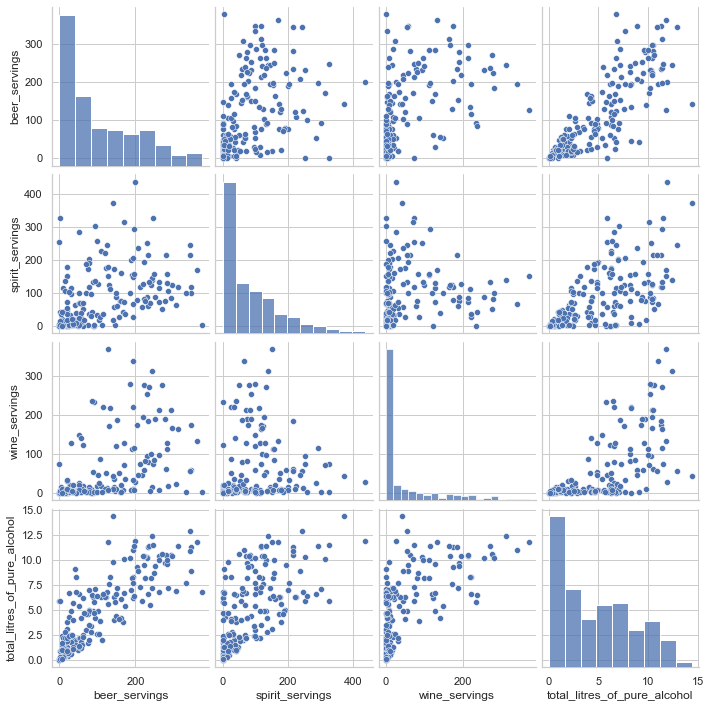

In [14]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

## 3단계) 데이터 정제와 탐색적 분석

## 데이터 정제

본격적인 탐색적 분석에 들어가기에 앞서 대륙 피처에 있는 결측치를 처리해야합니다. 대륙에 대한 정보가 없는 국가를 others, 줄여서 OT 라고 칭하려고 합니다. 

결측치를 다른 데이터로 채우는 함수는 **fillna** 입니다.

In [18]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


인덱스 5번 데이터의 대륙 피처가 결측치에서 OT 로 변경되었음을 알 수 있습니다.

이번에는 전체 대륙 중에서 OT 로 표시한 데이터의 비율이 전체에서 얼마나 되는지 파이차트로 확인해보고 싶습니다. 파이차트는 말 그대로 파이 모양의 차트로 항목별 비율을 확인하는데 용이합니다. 파이차트를 활용하기 위해서는 **plt.pie** 함수를 활용합니다.

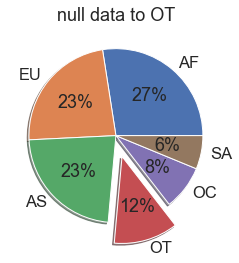

In [26]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0) # 떨어져나오는 파이의 간격 정도

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to OT')
plt.show()

## 탐색적 분석

이제 정제된 데이터를 가지고 탐색적 분석을 진행해보겠습니다.

### 1. 대륙별 증류주 소비량의 통계적 정보만 구하기

In [28]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


**agg** 함수는 **apply** 함수와 거의 동일한 기능을 하지만, 함수 파라미터를 병렬로 설정해 그룹에 대한 여러 연산 결과를 동시에 얻을 수 있는 기능이 있습니다.

### 2. 전체 평균보다 술을 많이 마시는 대륙 구하기

In [41]:
total_mean = drinks.total_litres_of_pure_alcohol.mean() # 전체 알코올 소비량 평균
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean() # 대륙별 알코올 소비량 평균
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [42]:
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

평균을 구하기 위해서는 **mean** 함수를 사용합니다.

### 3. 평균 맥주 소비량이 가장 높은 대륙 구하기

In [34]:
beer_max_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_max_continent

'EU'

**idxmax** 함수는 시리즈 객체에서 값이 가장 큰 인덱스를 자동으로 반환합니다. 위의 경우, 평균 맥주 소비량이 가장 높은 대륙을 반환합니다.

## 데이터 시각화

### 1. 대륙별 알코올 소비량의 평균, 최소, 최대, 합계 시각화

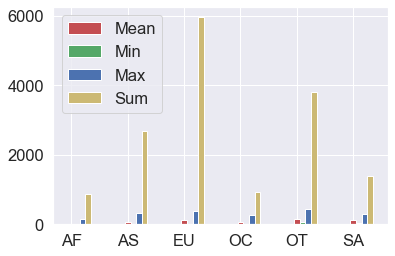

In [40]:
n_groups = len(result.index)

means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean') # 첫 파라미터 =  간격 설정
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

### 2. 대륙별 알코올 소비량 시각화

In [48]:
continents = continent_mean.index.tolist()
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [49]:
continents.append('mean') # 대륙 리스트에 평균(mean) 추가
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean']

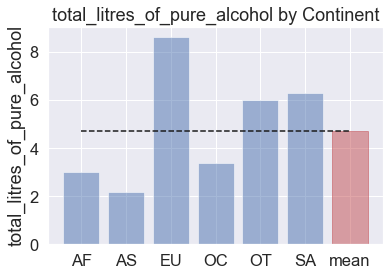

In [58]:
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean) # 전체 알코올 소비량 평균 추가

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')      # 끝에 있는 bar 를 빨간색으로 강조
plt.plot([0, 6], [total_mean, total_mean], 'k--') # 전체 알코올 소비량 평균을 기준으로 기준선 추가
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()